In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.
df.isnull().values.any()

np.False_

In [5]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         500 non-null    int64  
 1   GREScore          500 non-null    int64  
 2   TOEFLScore        500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
(df==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            220
ChanceofAdmit         0
dtype: int64

In [8]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [9]:
# b) Perform data-preparation (Train-Test Split)
from sklearn.model_selection import train_test_split

In [12]:
## x = Indepent Variable
## y = Dependent Variable

X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
# c) Apply Decision tree classification Algorithm

# Creating Decision Tree classifer object
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predicting for the test data
y_pred = clf.predict(X_test)


In [15]:
# d) Evaluate Model.
print("Confusion matrix:\n")

print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[69 11]
 [ 6 39]]


In [16]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test,y_pred))
print("2. Precision Score:", metrics.precision_score(y_test,y_pred))
print("3. Recall Score:", metrics.recall_score(y_test,y_pred))
print("4. F1 Score:", metrics.f1_score(y_test,y_pred))


1. Accuracy Score: 0.864
2. Precision Score: 0.78
3. Recall Score: 0.8666666666666667
4. F1 Score: 0.8210526315789474


In [17]:
print(y_test)

475    0.0
447    1.0
124    0.0
29     0.0
224    0.0
      ... 
180    0.0
338    1.0
15     0.0
370    0.0
361    1.0
Name: ChanceofAdmit, Length: 125, dtype: float64


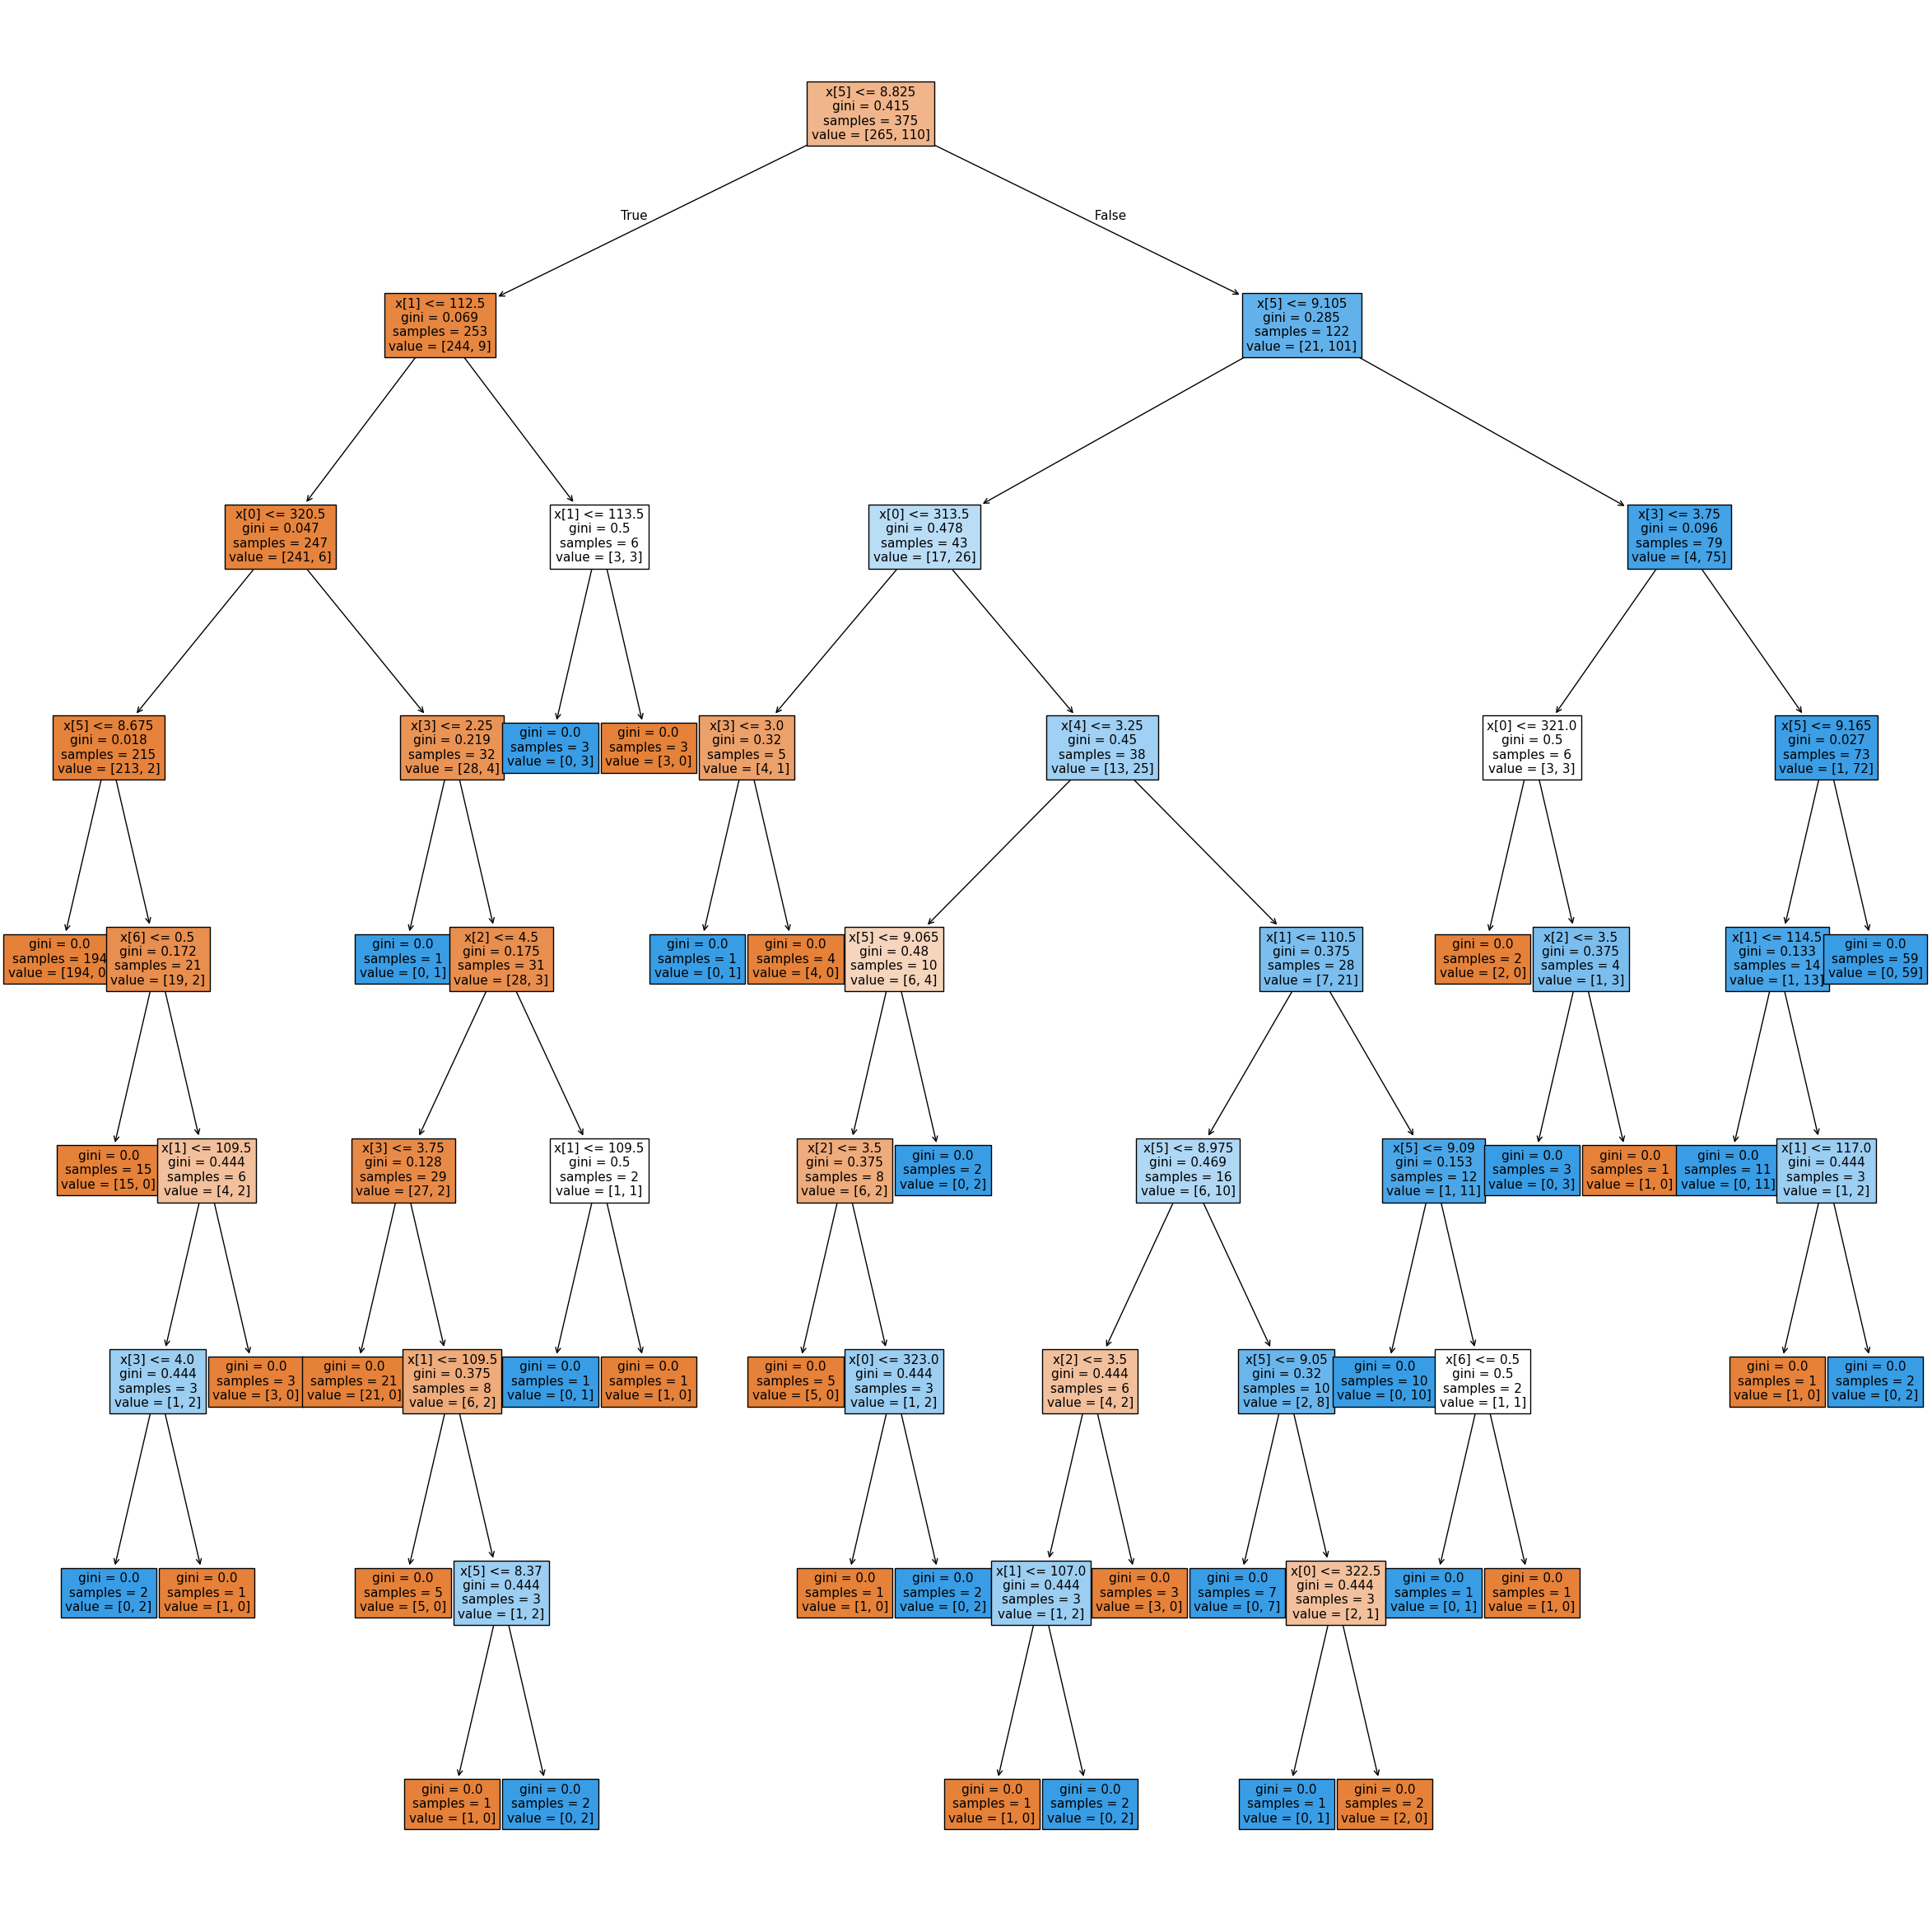

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=11)
plt.show()

In [20]:
clf.score(X_test,y_test)

0.864